# Exploratory Data Analysis

In [228]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data presentation
- **Population :** EV charging sessions  
- **Sample :** 259415 recorded sessions (before cleaning)  
- **Data description :** The dataset was created as part of the Palo Alto Open Data initiative. The data includes details on charging station locations, charging session durations, energy consumption, and other relevant metrics.

**Variables of interest** :  
Number of Variables: 5

* **Total Duration (hh:mm:ss):**  
Description : The total duration of charging sessions in hours, minutes, and seconds. We converted the values to floats in hours.  
Type : Numerical continuous  

* **Charging Time (hh:mm:ss):**  
Description : The actual time spent charging during each session in hours, minutes, and seconds. We converted the values to floats in hours.  
Type : Numerical continuous  

* **Energy (kWh):**  
Description : The amount of electrical energy consumed during charging (in kilowatt-hours).  
Type : Numerical continuous  

* **GHG Savings (kg):**  
Description : The greenhouse gas emissions avoided by using electric charging stations.  
Type : Numerical continuous  

* **Gasoline Savings (gallons):**  
Description : The amount of gasoline saved by using electric charging (in gallons).  
Type : Numerical continuous  


# Data Import

In [229]:
df = pd.read_csv('EVChargingStationUsage.csv')
df

C:\Users\selin\AppData\Local\Temp\ipykernel_6648\100100954.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


Station Name          MAC Address  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
...                                ...                  ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A   

                  Org Name        Start Date Start Time Zone  \
0        City of Palo Alto   7/29/2011 20:17             PDT   
1        City of Palo Alto    7/30/2011 0:00             PDT   
2        City of Palo Alto    7/30/2011 8:16             PDT   
3        City of Palo Alto   7/30/2011 14:51             PDT   
4        City of Palo Alto   7/30/2011 18:51             PDT   
...                    ...               ...             ...   
259410  City of Palo Alto   12/31/2020 16:39             PST   
259411  City of Palo Alto   12/31/2020 16:48             PST   
259412  City of Palo Alto   12/31/2020 17:28             PST   
259413  City of Palo Alto   12/31/2020 17:49             PST   
259414  City of Palo Alto   12/31/2020 18:19             PST   

                End Date End Time Zone Transaction Date (Pacific Time)  \
0        7/29/2011 23:20           PDT                 7/29/2011 23:20   
1         7/30/2011 0:02           PDT                  7/30/2011 0:02   
2        7/30/2011 12:34           PDT                 7/30/2011 12:34   
3        7/30/2011 16:55           PDT                 7/30/2011 16:55   
4        7/30/2011 20:03           PDT                 7/30/2011 20:03   
...                  ...           ...                             ...   
259410  12/31/2020 17:14           PST                12/31/2020 17:16   
259411  12/31/2020 20:31           PST                12/31/2020 20:32   
259412    1/1/2021 10:56           PST                  1/1/2021 10:57   
259413  12/31/2020 21:55           PST                12/31/2020 21:56   
259414  12/31/2020 19:01           PST                12/31/2020 19:02   

       Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  ...   Longitude  \
0                        3:03:32                  1:54:03  ... -122.160309   
1                        0:02:06                  0:01:54  ... -122.160309   
2                        4:17:32                  4:17:28  ... -122.160309   
3                        2:03:24                  2:02:58  ... -122.160309   
4                        1:11:24                  0:43:54  ... -122.160309   
...                          ...                      ...  ...         ...   
259410                   0:35:44                  0:35:18  ... -122.144043   
259411                   3:43:01                  2:14:04  ... -122.158272   
259412                  17:28:14                  5:08:12  ... -122.113510   
259413                   4:05:34                  3:53:42  ... -122.158272   
259414                   0:42:07                  0:41:44  ... -122.146034   

        Currency   Fee             Ended By  Plug In Event Id  \
0            USD  0.00  Plug Out at Vehicle                 3   
1            USD  0.00             Customer                 4   
2            USD  0.00  Plug Out at Vehicle                 5   
3            USD  0.00             Customer                 6   
4            USD  0.00  Plug Out at Vehicle                 7   
...          ...   ...                  ...               ...   
259410       USD  0.42  Plug Out at Vehicle              2369   
259411       USD  4.69  Plug Out at Vehicle              7255   
259412       USD  6.82  Plug Out at Vehicle               455   
259413       USD  2.75  

In [230]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

# Data Cleaning

## Discarding useless columns

In [231]:
df.drop(columns=['County', 'System S/N', 'Model Number','EVSE ID','Port Type','Port Number','Plug Type','Fee','Currency','Address 1','City','State/Province','Postal Code','Country','Ended By','Plug In Event Id','Driver Postal Code','Org Name','Transaction Date (Pacific Time)'],inplace=True)
df

Station Name          MAC Address        Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/29/2011 20:17   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 0:00   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 8:16   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 14:51   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 18:51   
...                                ...                  ...               ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  12/31/2020 16:39   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 16:48   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  12/31/2020 17:28   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 17:49   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  12/31/2020 18:19   

       Start Time Zone          End Date End Time Zone  \
0                  PDT   7/29/2011 23:20           PDT   
1                  PDT    7/30/2011 0:02           PDT   
2                  PDT   7/30/2011 12:34           PDT   
3                  PDT   7/30/2011 16:55           PDT   
4                  PDT   7/30/2011 20:03           PDT   
...                ...               ...           ...   
259410             PST  12/31/2020 17:14           PST   
259411             PST  12/31/2020 20:31           PST   
259412             PST    1/1/2021 10:56           PST   
259413             PST  12/31/2020 21:55           PST   
259414             PST  12/31/2020 19:01           PST   

       Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  Energy (kWh)  \
0                        3:03:32                  1:54:03      6.249457   
1                        0:02:06                  0:01:54      0.106588   
2                        4:17:32                  4:17:28     14.951777   
3                        2:03:24                  2:02:58      7.159643   
4                        1:11:24                  0:43:54      1.957765   
...                          ...                      ...           ...   
259410                   0:35:44                  0:35:18      1.841000   
259411                   3:43:01                  2:14:04     12.744000   
259412                  17:28:14                  5:08:12     29.665000   
259413                   4:05:34                  3:53:42     11.976000   
259414                   0:42:07                  0:41:44      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons)   Latitude   Longitude  \
0                  2.625                       0.784  37.444572 -122.160309   
1                  0.045                       0.013  37.444572 -122.160309   
2                  6.280                       1.876  37.444572 -122.160309   
3                  3.007                       0.899  37.444572 -122.160309   
4                  0.822                       0.246  37.444572 -122.160309   
...                  ...                         ...        ...         ...   
259410             0.773                       0.231  37.428623 -122.144043   
259411             5.352                       1.599  37.448284 -122.158272   
259412            12.459                       3.723  37.422104 -122.113510   
259413             5.030                       1.503  37.448284 -122.158272   
259414             0.660                       0.197  37.426178 -122.146034   

        User ID  
0        3284.0  
1        4169.0  
2        4169.0  
3        2545.0  
4        3765.0  
...         ...  
259410  2024201  
259411   242661  
259412   449995  
259413   804075  
259414  2022651  

[259415 rows x 14 columns]

## Removing rows with duplicates

In [232]:
df.drop_duplicates()

Station Name          MAC Address        Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/29/2011 20:17   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 0:00   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 8:16   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 14:51   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 18:51   
...                                ...                  ...               ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  12/31/2020 16:39   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 16:48   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  12/31/2020 17:28   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 17:49   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  12/31/2020 18:19   

       Start Time Zone          End Date End Time Zone  \
0                  PDT   7/29/2011 23:20           PDT   
1                  PDT    7/30/2011 0:02           PDT   
2                  PDT   7/30/2011 12:34           PDT   
3                  PDT   7/30/2011 16:55           PDT   
4                  PDT   7/30/2011 20:03           PDT   
...                ...               ...           ...   
259410             PST  12/31/2020 17:14           PST   
259411             PST  12/31/2020 20:31           PST   
259412             PST    1/1/2021 10:56           PST   
259413             PST  12/31/2020 21:55           PST   
259414             PST  12/31/2020 19:01           PST   

       Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  Energy (kWh)  \
0                        3:03:32                  1:54:03      6.249457   
1                        0:02:06                  0:01:54      0.106588   
2                        4:17:32                  4:17:28     14.951777   
3                        2:03:24                  2:02:58      7.159643   
4                        1:11:24                  0:43:54      1.957765   
...                          ...                      ...           ...   
259410                   0:35:44                  0:35:18      1.841000   
259411                   3:43:01                  2:14:04     12.744000   
259412                  17:28:14                  5:08:12     29.665000   
259413                   4:05:34                  3:53:42     11.976000   
259414                   0:42:07                  0:41:44      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons)   Latitude   Longitude  \
0                  2.625                       0.784  37.444572 -122.160309   
1                  0.045                       0.013  37.444572 -122.160309   
2                  6.280                       1.876  37.444572 -122.160309   
3                  3.007                       0.899  37.444572 -122.160309   
4                  0.822                       0.246  37.444572 -122.160309   
...                  ...                         ...        ...         ...   
259410             0.773                       0.231  37.428623 -122.144043   
259411             5.352                       1.599  37.448284 -122.158272   
259412            12.459                       3.723  37.422104 -122.113510   
259413             5.030                       1.503  37.448284 -122.158272   
259414             0.660                       0.197  37.426178 -122.146034   

        User ID  
0        3284.0  
1        4169.0  
2        4169.0  
3        2545.0  
4        3765.0  
...         ...  
259410  2024201  
259411   242661  
259412   449995  
259413   804075  
259414  2022651  

[259411 rows x 14 columns]

## Calculating number of missing values per columns

In [284]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Station Name                   0
MAC Address                    0
Start Date                     0
End Date                      40
Total Duration (hours)         0
Charging (hours)               0
Energy (kWh)                   0
GHG Savings (kg)               0
Gasoline Savings (gallons)     0
Latitude                       0
Longitude                      0
User ID                        0
day_of_week                    0
geometry                       0
dtype: int64


## Calculating percentage of missing values

In [285]:
print("Percentage of missing values:")
perc = round(df.isnull().sum() / len(df), 2) * 100

missing_columns = perc[perc > 0]
print(missing_columns)

Percentage of missing values:
Series([], dtype: float64)


## Replacing missing values

In [235]:
df['User ID'] = df['User ID'].fillna("No user ID")

## Converting duration variables into hours

In [236]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)']).dt.total_seconds()/3600
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)']).dt.total_seconds()/3600

df.rename(columns = {'Total Duration (hh:mm:ss)': 'Total Duration (hours)', 'Charging Time (hh:mm:ss)': 'Charging (hours)'}, inplace = True)

df

Station Name          MAC Address        Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/29/2011 20:17   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 0:00   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 8:16   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 14:51   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 18:51   
...                                ...                  ...               ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  12/31/2020 16:39   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 16:48   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  12/31/2020 17:28   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 17:49   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  12/31/2020 18:19   

       Start Time Zone          End Date End Time Zone  \
0                  PDT   7/29/2011 23:20           PDT   
1                  PDT    7/30/2011 0:02           PDT   
2                  PDT   7/30/2011 12:34           PDT   
3                  PDT   7/30/2011 16:55           PDT   
4                  PDT   7/30/2011 20:03           PDT   
...                ...               ...           ...   
259410             PST  12/31/2020 17:14           PST   
259411             PST  12/31/2020 20:31           PST   
259412             PST    1/1/2021 10:56           PST   
259413             PST  12/31/2020 21:55           PST   
259414             PST  12/31/2020 19:01           PST   

        Total Duration (hours)  Charging (hours)  Energy (kWh)  \
0                     3.058889          1.900833      6.249457   
1                     0.035000          0.031667      0.106588   
2                     4.292222          4.291111     14.951777   
3                     2.056667          2.049444      7.159643   
4                     1.190000          0.731667      1.957765   
...                        ...               ...           ...   
259410                0.595556          0.588333      1.841000   
259411                3.716944          2.234444     12.744000   
259412               17.470556          5.136667     29.665000   
259413                4.092778          3.895000     11.976000   
259414                0.701944          0.695556      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons)   Latitude   Longitude  \
0                  2.625                       0.784  37.444572 -122.160309   
1                  0.045                       0.013  37.444572 -122.160309   
2                  6.280                       1.876  37.444572 -122.160309   
3                  3.007                       0.899  37.444572 -122.160309   
4                  0.822                       0.246  37.444572 -122.160309   
...                  ...                         ...        ...         ...   
259410             0.773                       0.231  37.428623 -122.144043   
259411             5.352                       1.599  37.448284 -122.158272   
259412            12.459                       3.723  37.422104 -122.113510   
259413             5.030                       1.503  37.448284 -122.158272   
259414             0.660                       0.197  37.426178 -122.146034   

        User ID  
0        3284.0  
1        4169.0  
2        4169.0  
3        2545.0  
4        3765.0  
...         ...  
259410  2024201  
259411   242661  
259412   449995  
259413   804075  
259414  2022651  

[259415 rows x 14 columns]

# Harmonizing into Pacific Daylight Time (PDT)

In [237]:
df['Start Time Zone'].unique(), df['End Time Zone'].unique() 

(array(['PDT', 'PST', 'UTC'], dtype=object),
 array(['PDT', 'PST', 'UTC'], dtype=object))

Pacific Standard Time (PST) is one hour behind Pacific Daylight Time (PDT).  
Coordinated Universal Time (UTC) is seven hours ahead of Pacific Daylight Time (PDT).  
So we harmonize the timestamps accordingly.  

In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M', errors = 'coerce')


df.loc[df['Start Time Zone'] == 'PST', 'Start Date'] = df['Start Date'] + dt.timedelta(hours=1)
df.loc[df['End Time Zone'] == 'PST', 'End Date'] = df['End Date'] + dt.timedelta(hours=1)

df.loc[df['Start Time Zone'] == 'UTC', 'Start Date'] = df['Start Date'] - dt.timedelta(hours=7)
df.loc[df['End Time Zone'] == 'UTC', 'End Date'] = df['End Date'] - dt.timedelta(hours=7)

df.drop(columns = ['Start Time Zone','End Time Zone'], inplace = True)

df

Station Name          MAC Address  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
...                                ...                  ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A   

                Start Date            End Date  Total Duration (hours)  \
0      2011-07-29 20:17:00 2011-07-29 23:20:00                3.058889   
1      2011-07-30 00:00:00 2011-07-30 00:02:00                0.035000   
2      2011-07-30 08:16:00 2011-07-30 12:34:00                4.292222   
3      2011-07-30 14:51:00 2011-07-30 16:55:00                2.056667   
4      2011-07-30 18:51:00 2011-07-30 20:03:00                1.190000   
...                    ...                 ...                     ...   
259410 2020-12-31 17:39:00 2020-12-31 18:14:00                0.595556   
259411 2020-12-31 17:48:00 2020-12-31 21:31:00                3.716944   
259412 2020-12-31 18:28:00 2021-01-01 11:56:00               17.470556   
259413 2020-12-31 18:49:00 2020-12-31 22:55:00                4.092778   
259414 2020-12-31 19:19:00 2020-12-31 20:01:00                0.701944   

        Charging (hours)  Energy (kWh)  GHG Savings (kg)  \
0               1.900833      6.249457             2.625   
1               0.031667      0.106588             0.045   
2               4.291111     14.951777             6.280   
3               2.049444      7.159643             3.007   
4               0.731667      1.957765             0.822   
...                  ...           ...               ...   
259410          0.588333      1.841000             0.773   
259411          2.234444     12.744000             5.352   
259412          5.136667     29.665000            12.459   
259413          3.895000     11.976000             5.030   
259414          0.695556      1.571000             0.660   

        Gasoline Savings (gallons)   Latitude   Longitude  User ID  
0                            0.784  37.444572 -122.160309   3284.0  
1                            0.013  37.444572 -122.160309   4169.0  
2                            1.876  37.444572 -122.160309   4169.0  
3                            0.899  37.444572 -122.160309   2545.0  
4                            0.246  37.444572 -122.160309   3765.0  
...                            ...        ...         ...      ...  
259410                       0.231  37.428623 -122.144043  2024201  
259411                       1.599  37.448284 -122.158272   242661  
259412                       3.723  37.422104 -122.113510   449995  
259413                       1.503  37.448284 -122.158272   804075  
259414                       0.197  37.426178 -122.146034  2022651  

[259415 rows x 12 columns]

## Converting Start Date to day of the week 

In [239]:
df["day_of_week"] = pd.to_datetime(df["Start Date"]).dt.day_name()

df

Station Name          MAC Address  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
...                                ...                  ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A   

                Start Date            End Date  Total Duration (hours)  \
0      2011-07-29 20:17:00 2011-07-29 23:20:00                3.058889   
1      2011-07-30 00:00:00 2011-07-30 00:02:00                0.035000   
2      2011-07-30 08:16:00 2011-07-30 12:34:00                4.292222   
3      2011-07-30 14:51:00 2011-07-30 16:55:00                2.056667   
4      2011-07-30 18:51:00 2011-07-30 20:03:00                1.190000   
...                    ...                 ...                     ...   
259410 2020-12-31 17:39:00 2020-12-31 18:14:00                0.595556   
259411 2020-12-31 17:48:00 2020-12-31 21:31:00                3.716944   
259412 2020-12-31 18:28:00 2021-01-01 11:56:00               17.470556   
259413 2020-12-31 18:49:00 2020-12-31 22:55:00                4.092778   
259414 2020-12-31 19:19:00 2020-12-31 20:01:00                0.701944   

        Charging (hours)  Energy (kWh)  GHG Savings (kg)  \
0               1.900833      6.249457             2.625   
1               0.031667      0.106588             0.045   
2               4.291111     14.951777             6.280   
3               2.049444      7.159643             3.007   
4               0.731667      1.957765             0.822   
...                  ...           ...               ...   
259410          0.588333      1.841000             0.773   
259411          2.234444     12.744000             5.352   
259412          5.136667     29.665000            12.459   
259413          3.895000     11.976000             5.030   
259414          0.695556      1.571000             0.660   

        Gasoline Savings (gallons)   Latitude   Longitude  User ID day_of_week  
0                            0.784  37.444572 -122.160309   3284.0      Friday  
1                            0.013  37.444572 -122.160309   4169.0    Saturday  
2                            1.876  37.444572 -122.160309   4169.0    Saturday  
3                            0.899  37.444572 -122.160309   2545.0    Saturday  
4                            0.246  37.444572 -122.160309   3765.0    Saturday  
...                            ...        ...         ...      ...         ...  
259410                       0.231  37.428623 -122.144043  2024201    Thursday  
259411                       1.599  37.448284 -122.158272   242661    Thursday  
259412                       3.723  37.422104 -122.113510   449995    Thursday  
259413                       1.503  37.448284 -122.158272   804075    Thursday  
259414                       0.197  37.426178 -122.146034  2022651    Thursday  

[259415 rows x 13 columns]

# Descriptive Statistics :

## Summary Stats

In [240]:
df.describe()

Start Date                       End Date  \
count                         259415                         259375   
mean   2017-06-15 03:40:54.648189184  2017-06-15 06:16:42.658930688   
min              2011-07-29 20:17:00            2011-07-29 23:20:00   
25%              2016-04-12 21:31:00            2016-04-12 22:29:00   
50%              2017-07-15 10:51:00            2017-07-15 13:32:00   
75%              2019-01-25 09:33:30            2019-01-25 13:10:30   
max              2020-12-31 19:19:00            2021-01-04 22:01:00   
std                              NaN                            NaN   

       Total Duration (hours)  Charging (hours)   Energy (kWh)  \
count           259415.000000     259415.000000  259415.000000   
mean                 2.486821          1.999124       8.544277   
min                  0.016667          0.001667       0.010000   
25%                  1.170833          1.040000       3.784000   
50%                  2.089167          1.816389       6.868634   
75%                  3.090000          2.697222      11.458340   
max                114.539167         22.931944      97.360000   
std                  2.212661          1.382584       7.185462   

       GHG Savings (kg)  Gasoline Savings (gallons)       Latitude  \
count     259415.000000               259415.000000  259415.000000   
mean           3.588596                    1.072306      37.439565   
min            0.004000                    0.001000      37.422104   
25%            1.589000                    0.475000      37.428318   
50%            2.885000                    0.862000      37.444489   
75%            4.813000                    1.438000      37.446613   
max           40.891000                   12.219000      37.449375   
std            3.017894                    0.901776       0.009621   

           Longitude  
count  259415.000000  
mean     -122.151264  
min      -122.163239  
25%      -122.162170  
50%      -122.158272  
75%      -122.145699  
max      -122.112480  
std         0.015382

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Station Name                259415 non-null  object        
 1   MAC Address                 259415 non-null  object        
 2   Start Date                  259415 non-null  datetime64[ns]
 3   End Date                    259375 non-null  datetime64[ns]
 4   Total Duration (hours)      259415 non-null  float64       
 5   Charging (hours)            259415 non-null  float64       
 6   Energy (kWh)                259415 non-null  float64       
 7   GHG Savings (kg)            259415 non-null  float64       
 8   Gasoline Savings (gallons)  259415 non-null  float64       
 9   Latitude                    259415 non-null  float64       
 10  Longitude                   259415 non-null  float64       
 11  User ID                     259415 non-

# Geospatial plot :

In [ ]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

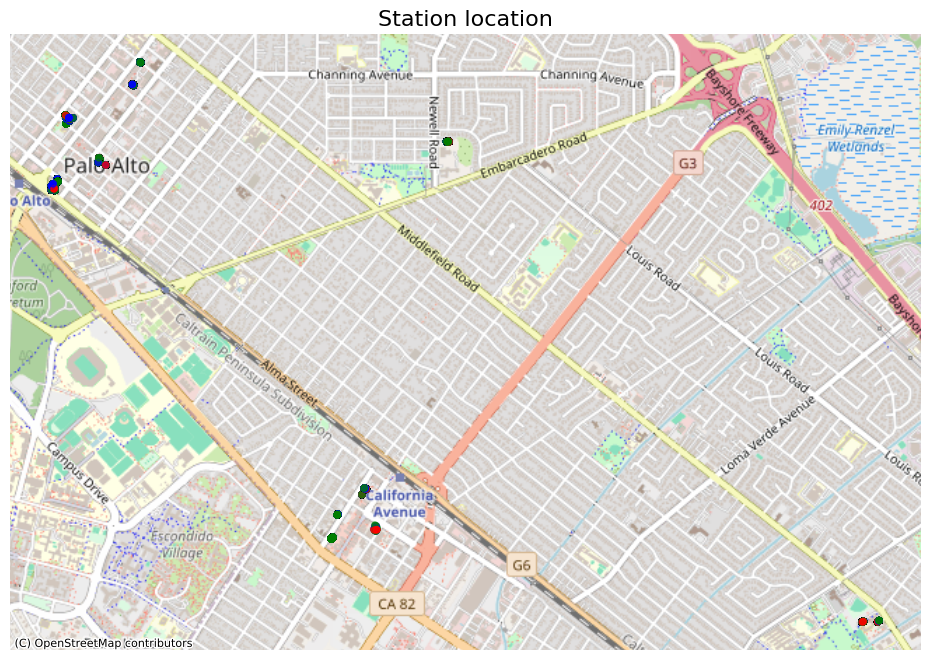

In [ ]:
# Convert latitude and longitude into Point geometries
df['geometry'] = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Assign colors based on energy
gdf['color'] = gdf['Energy (kWh)'].apply(lambda p: 'green' if p < 10 else 'blue' if p <20  else 'red')

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=20, alpha=0.7)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Station location", fontsize=16)
ax.set_axis_off()
plt.show()

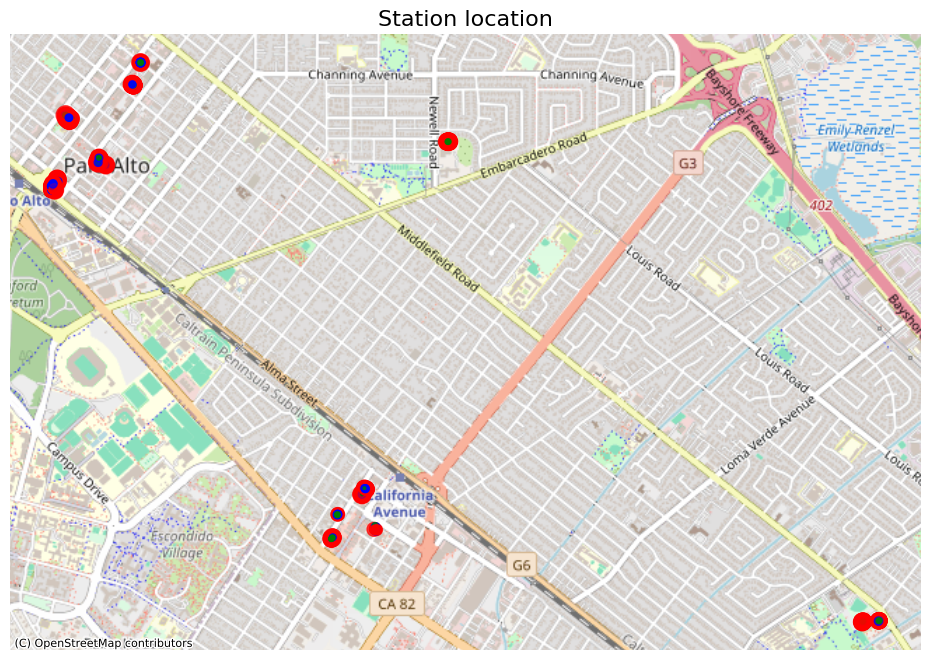

In [ ]:
# Convert latitude and longitude into Point geometries
df['geometry'] = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Assign colors based on energy
gdf['color'] = gdf['Energy (kWh)'].apply(lambda p: 'green' if p < 10 else 'blue' if p < 20 else 'red')

# Calculate marker size based on energy 
gdf['markersize'] = gdf['Energy (kWh)'] * 2  # Adjust the scaling factor 2 as needed

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=gdf['markersize'], alpha=0.7)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Station location", fontsize=16)
ax.set_axis_off()
plt.show()


# Univariate analysis :

## Continuous variables :

{'whiskers': [<matplotlib.lines.Line2D at 0x168c9bb9c10>,
 'caps': [<matplotlib.lines.Line2D at 0x168c9bb9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x168c9bbb500>],
 'medians': [<matplotlib.lines.Line2D at 0x168c9bbba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x168c9bb9dc0>],
 'means': []}

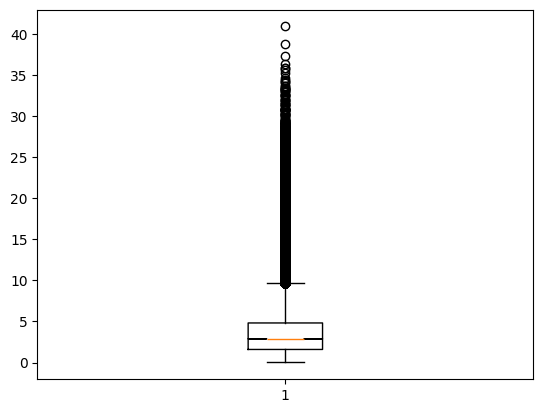

In [244]:
bins = 40
plt.boxplot(df['GHG Savings (kg)'], bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x168c9b3e120>,
 'caps': [<matplotlib.lines.Line2D at 0x168c9b3c9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168c9b3d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x168c9b3ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x168c9b3f1d0>],
 'means': []}

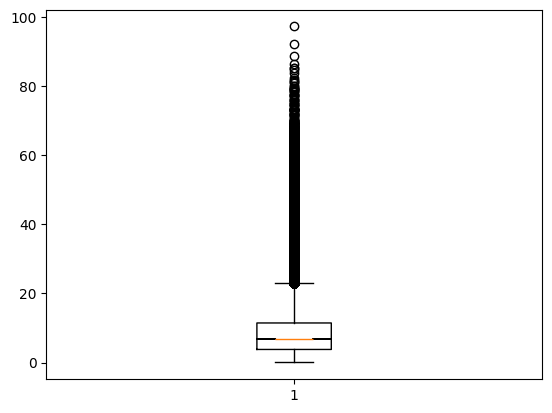

In [245]:
bins = 40
plt.boxplot(df['Energy (kWh)'],bins)

In [246]:
bins = 40
plt.boxplot(df['Gasoline Savings (gallons)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x168d6f97b30>,
 'caps': [<matplotlib.lines.Line2D at 0x168d6f94b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x168d6f949e0>],
 'medians': [<matplotlib.lines.Line2D at 0x168d8a52990>],
 'fliers': [<matplotlib.lines.Line2D at 0x168d8a50170>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x168d6edb950>,
 'caps': [<matplotlib.lines.Line2D at 0x168d4014290>,
 'boxes': [<matplotlib.lines.Line2D at 0x168d4015eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x168d4017080>],
 'fliers': [<matplotlib.lines.Line2D at 0x168d4014800>],
 'means': []}

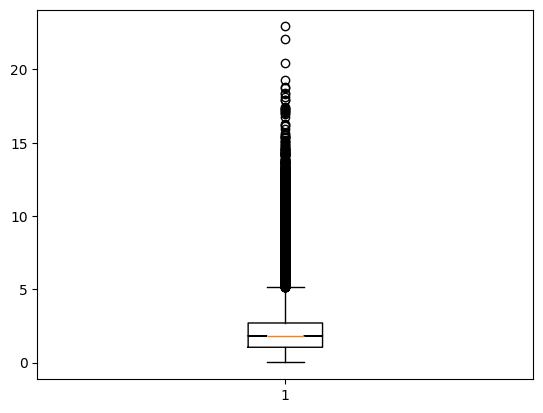

In [247]:
bins = 40
plt.boxplot(df['Charging (hours)'],bins)

In [248]:
bins = 40
plt.boxplot(df['Total Duration (hours)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x168d6f39d60>,
 'caps': [<matplotlib.lines.Line2D at 0x168d6f3aa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x168d6f3ba70>],
 'medians': [<matplotlib.lines.Line2D at 0x168d6f72b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x169011b5460>],
 'means': []}

## Detecting outliers in the energy column

In [249]:
Q1 = df['Energy (kWh)'].quantile(0.25)
Q3 = df['Energy (kWh)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Energy (kWh)'] < lower_bound) | (df['Energy (kWh)'] > upper_bound)]
print(f"Number of outliers in 'Energy (kWh)': {len(outliers)}")

print("Energy Outliers :")
print(outliers['Energy (kWh)'].describe())

df_cleaned = df[(df['Energy (kWh)'] >= lower_bound) & (df['Energy (kWh)'] <= upper_bound)]

Number of outliers in 'Energy (kWh)': 8696
Energy Outliers :
count    8696.000000
mean       34.379163
std        11.158304
min        22.970000
25%        26.023750
50%        30.383851
75%        39.594228
max        97.360000
Name: Energy (kWh), dtype: float64


## Histogram for the "energy" variable

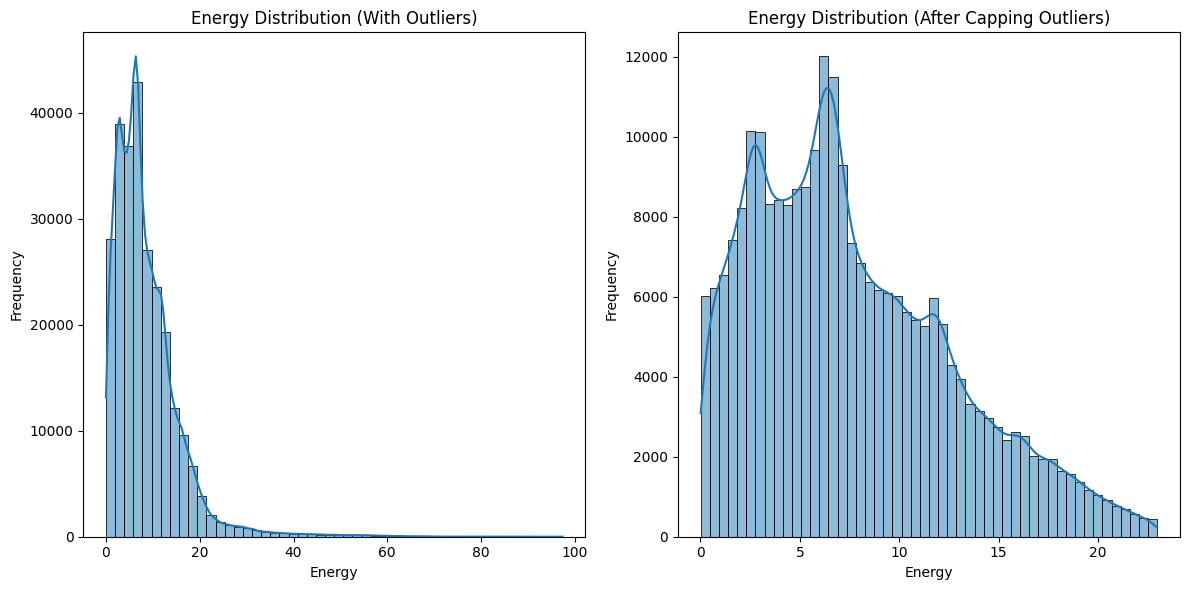

In [250]:
# histogram before handling outliers 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Energy (kWh)'], bins=50, kde=True)
plt.title('Energy Distribution (With Outliers)')
plt.xlabel('Energy')
plt.ylabel('Frequency')

# histogram after handling outliers 
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Energy (kWh)'], bins=50, kde=True)
plt.title('Energy Distribution (After Capping Outliers)')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Detecting outliers in the Gasoline Savings (gallons) column

In [251]:
Q1 = df['Gasoline Savings (gallons)'].quantile(0.25)
Q3 = df['Gasoline Savings (gallons)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Gasoline Savings (gallons)'] < lower_bound) | (df['Gasoline Savings (gallons)'] > upper_bound)]
print(f"Number of outliers in 'Gasoline Savings (gallons)': {len(outliers)}")

print("Gasoline Savings Outliers :")
print(outliers['Gasoline Savings (gallons)'].describe())

df_cleaned = df[(df['Gasoline Savings (gallons)'] >= lower_bound) & (df['Gasoline Savings (gallons)'] <= upper_bound)]

Number of outliers in 'Gasoline Savings (gallons)': 8697
Gasoline Savings Outliers :
count    8697.000000
mean        4.314418
std         1.400371
min         2.883000
25%         3.266000
50%         3.813000
75%         4.968000
max        12.219000
Name: Gasoline Savings (gallons), dtype: float64


## Histogram for the "gasoline" variable

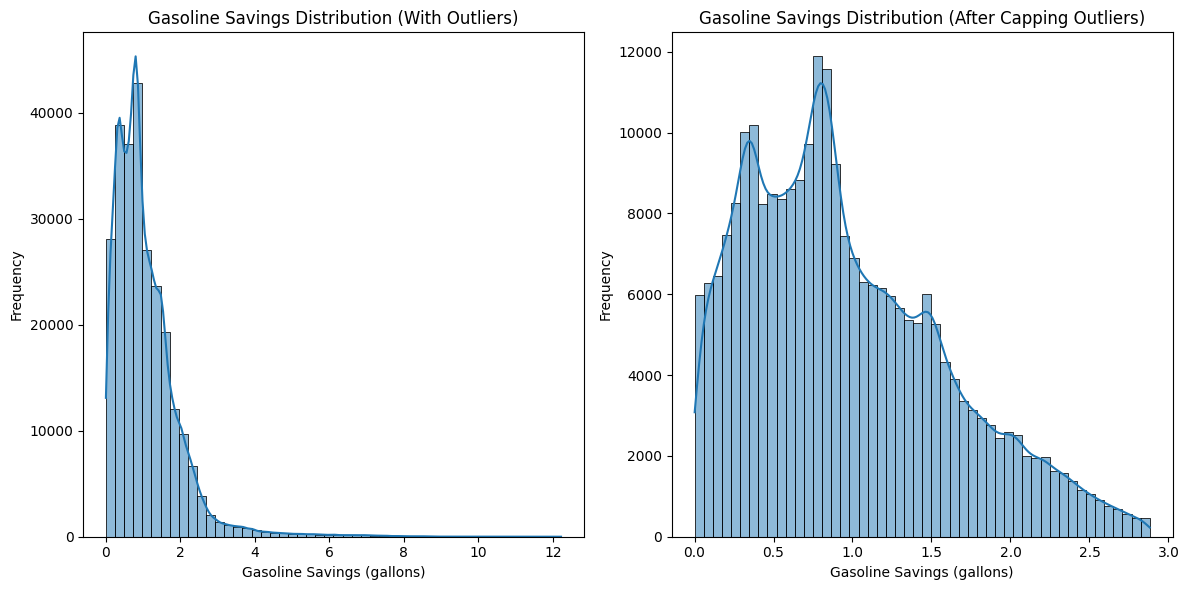

In [252]:
# histogram before handling outliers 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Gasoline Savings (gallons)'], bins=50, kde=True)
plt.title('Gasoline Savings Distribution (With Outliers)')
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Frequency')

# histogram after handling outliers 
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Gasoline Savings (gallons)'], bins=50, kde=True)
plt.title('Gasoline Savings Distribution (After Capping Outliers)')
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Detecting outliers in the GHG Savings (kg) column

In [253]:
Q1 = df['GHG Savings (kg)'].quantile(0.25)
Q3 = df['GHG Savings (kg)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['GHG Savings (kg)'] < lower_bound) | (df['GHG Savings (kg)'] > upper_bound)]
print(f"Number of outliers in 'Gasoline Savings (gallons)': {len(outliers)}")

print("GHG Savings Outliers :")
print(outliers['GHG Savings (kg)'].describe())

df_cleaned = df[(df['GHG Savings (kg)'] >= lower_bound) & (df['GHG Savings (kg)'] <= upper_bound)]

Number of outliers in 'Gasoline Savings (gallons)': 8692
GHG Savings Outliers :
count    8692.000000
mean       14.441448
std         4.686438
min         9.650000
25%        10.933000
50%        12.762000
75%        16.641750
max        40.891000
Name: GHG Savings (kg), dtype: float64


## Histogram for the "gasoline" variable

In [254]:
# histogram before handling outliers 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['GHG Savings (kg)'], bins=50, kde=True)
plt.title('GHG Savings Distribution (With Outliers)')
plt.xlabel('GHG Savings (kg)')
plt.ylabel('Frequency')

# histogram after handling outliers 
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['GHG Savings (kg)'], bins=50, kde=True)
plt.title('GHG Savings Distribution (After Capping Outliers)')
plt.xlabel('GHG Savings (kg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Detecting outliers in the Total Duration (hours) column

In [255]:
Q1 = df['Total Duration (hours)'].quantile(0.25)
Q3 = df['Total Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Total Duration (hours)'] < lower_bound) | (df['Total Duration (hours)'] > upper_bound)]
print(f"Number of outliers in Total Duration (hours): {len(outliers)}")

print("Total Duration Outliers :")
print(outliers['Total Duration (hours)'].describe())

df_cleaned = df[(df['Total Duration (hours)'] >= lower_bound) & (df['Total Duration (hours)'] <= upper_bound)]

Number of outliers in Total Duration (hours): 12763
Total Duration Outliers :
count    12763.000000
mean         9.780205
std          3.685766
min          5.969167
25%          7.301806
50%          9.148056
75%         11.449444
max        114.539167
Name: Total Duration (hours), dtype: float64


## Histogram for the "total duration" variable

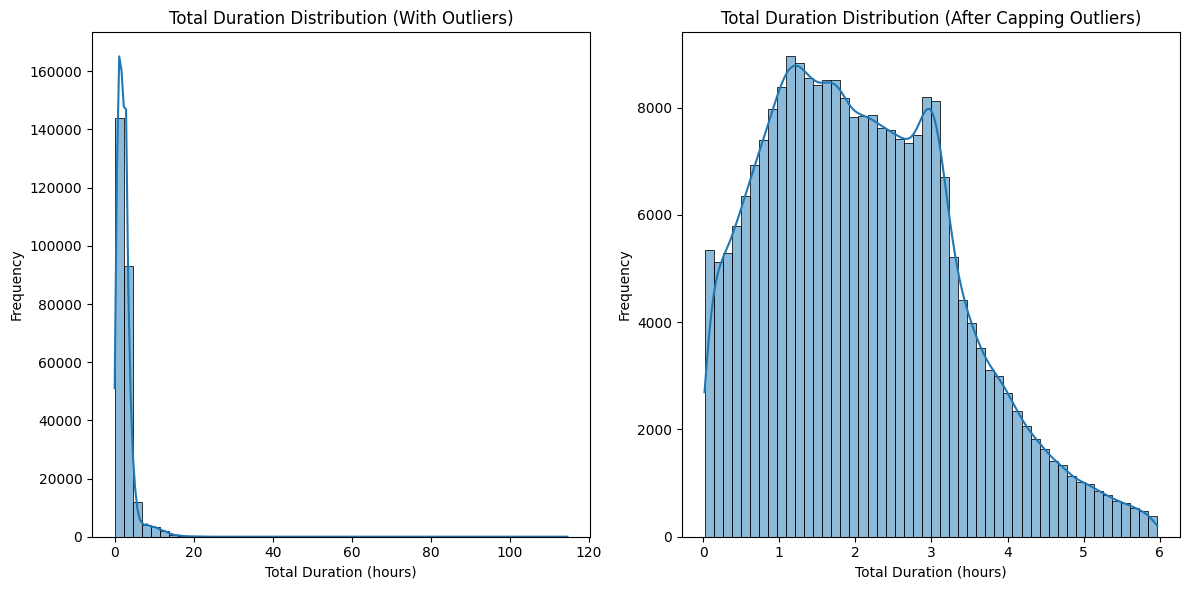

In [256]:
# histogram before handling outliers 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total Duration (hours)'], bins=50, kde=True)
plt.title('Total Duration Distribution (With Outliers)')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')

# histogram after handling outliers 
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Total Duration (hours)'], bins=50, kde=True)
plt.title('Total Duration Distribution (After Capping Outliers)')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Detecting outliers in the Charging (hours) column

In [257]:
Q1 = df['Charging (hours)'].quantile(0.25)
Q3 = df['Charging (hours)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Charging (hours)'] < lower_bound) | (df['Charging (hours)'] > upper_bound)]
print(f"Number of outliers in Charging (hours) (gallons)': {len(outliers)}")

print("Charging Outliers :")
print(outliers['Charging (hours)'].describe())

df_cleaned = df[(df['Charging (hours)'] >= lower_bound) & (df['Charging (hours)'] <= upper_bound)]

Number of outliers in Charging (hours) (gallons)': 5518
Charging Outliers :
count    5518.000000
mean        7.292262
std         2.123930
min         5.183333
25%         5.641389
50%         6.593472
75%         8.403125
max        22.931944
Name: Charging (hours), dtype: float64


## Histogram for the "charging" variable

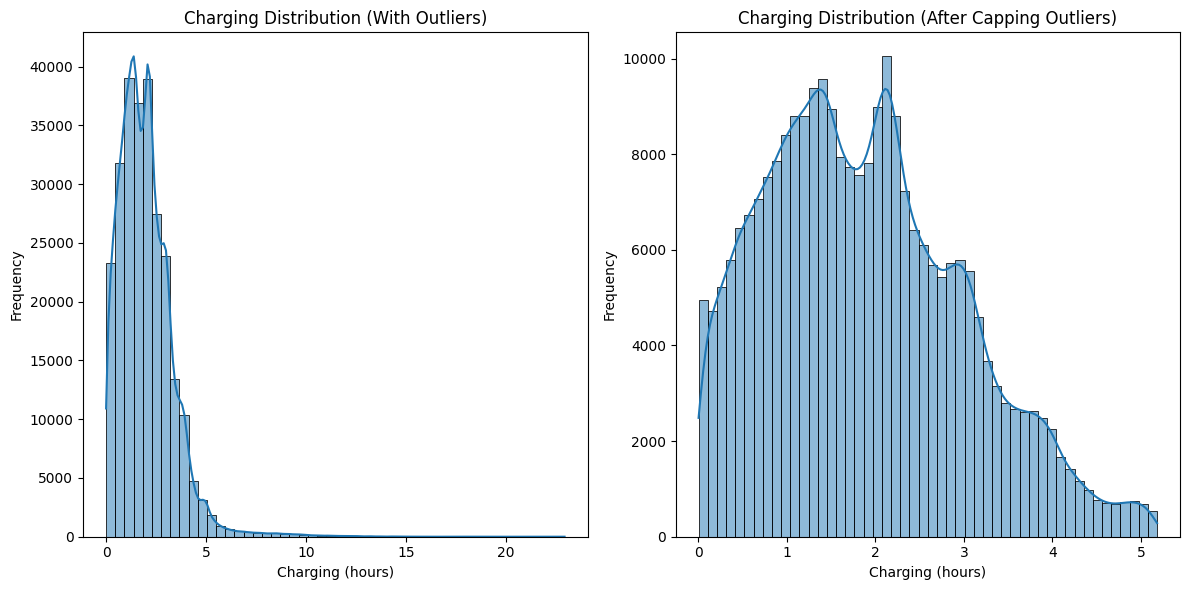

In [258]:
# histogram before handling outliers 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Charging (hours)'], bins=50, kde=True)
plt.title('Charging Distribution (With Outliers)')
plt.xlabel('Charging (hours)')
plt.ylabel('Frequency')

# histogram after handling outliers 
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Charging (hours)'], bins=50, kde=True)
plt.title('Charging Distribution (After Capping Outliers)')
plt.xlabel('Charging (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculating Bins for 'Energy (kWh)'

In [259]:
def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [ ]:
sbins = calculate_bins(df_cleaned['Energy (kWh)'] , method = 'sturges')
sqrt_bins = calculate_bins(df_cleaned['Energy (kWh)'] , method = 'sqrt')
fd_bins = calculate_bins(df_cleaned['Energy (kWh)'] , method = 'fd')

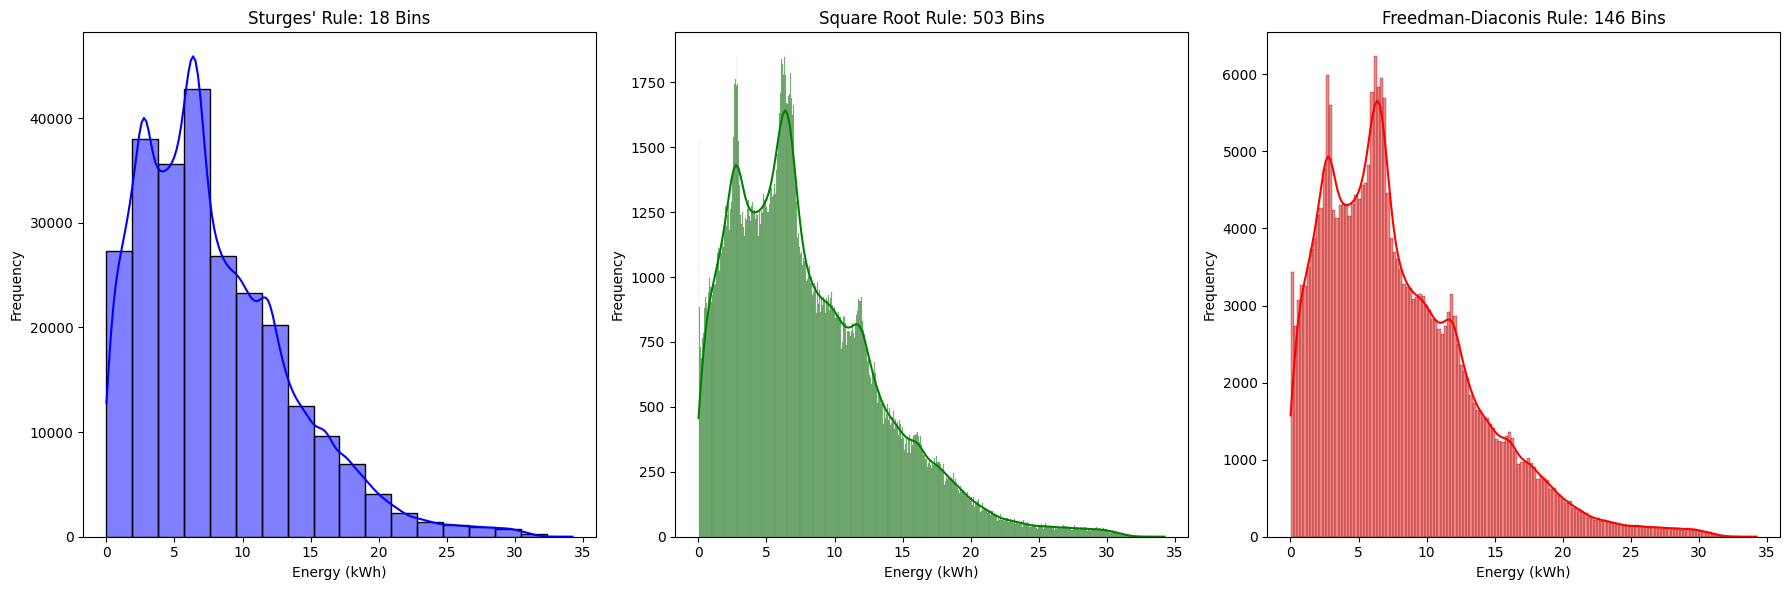

In [261]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Energy (kWh)'], bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Energy (kWh)'], bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Energy (kWh)'], bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Calculating Bins for 'Gasoline Savings (gallons)'

In [262]:
def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [ ]:
sbins = calculate_bins(df_cleaned['Gasoline Savings (gallons)'] , method = 'sturges')
sqrt_bins = calculate_bins(df_cleaned['Gasoline Savings (gallons)'] , method = 'sqrt')
fd_bins = calculate_bins(df_cleaned['Gasoline Savings (gallons)'] , method = 'fd')

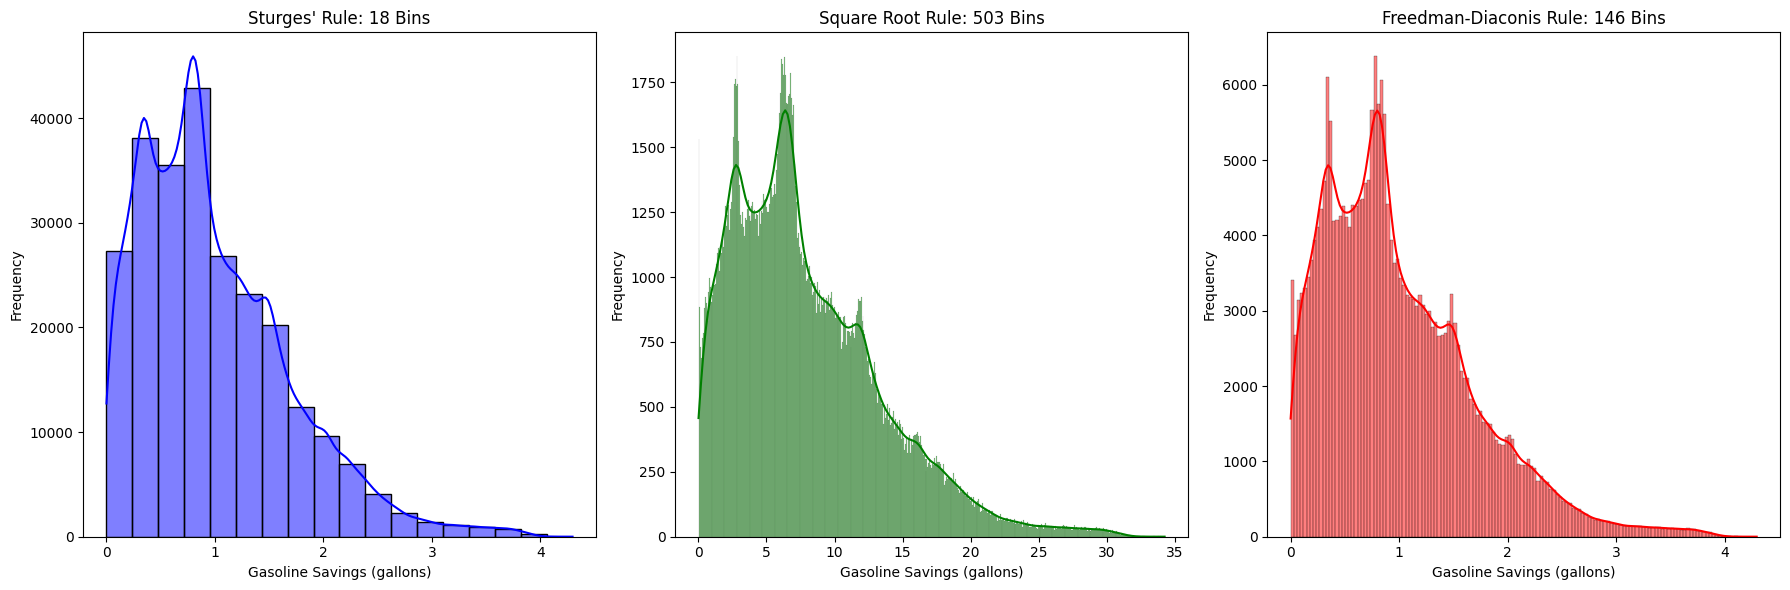

In [264]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Gasoline Savings (gallons)'], bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Energy (kWh)'], bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Gasoline Savings (gallons)'], bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Calculating Bins for 'GHG Savings (kg)'

In [265]:
def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [ ]:
sbins = calculate_bins(df_cleaned['GHG Savings (kg)'] , method = 'sturges')
sqrt_bins = calculate_bins(df_cleaned['GHG Savings (kg)'] , method = 'sqrt')
fd_bins = calculate_bins(df_cleaned['GHG Savings (kg)'] , method = 'fd')

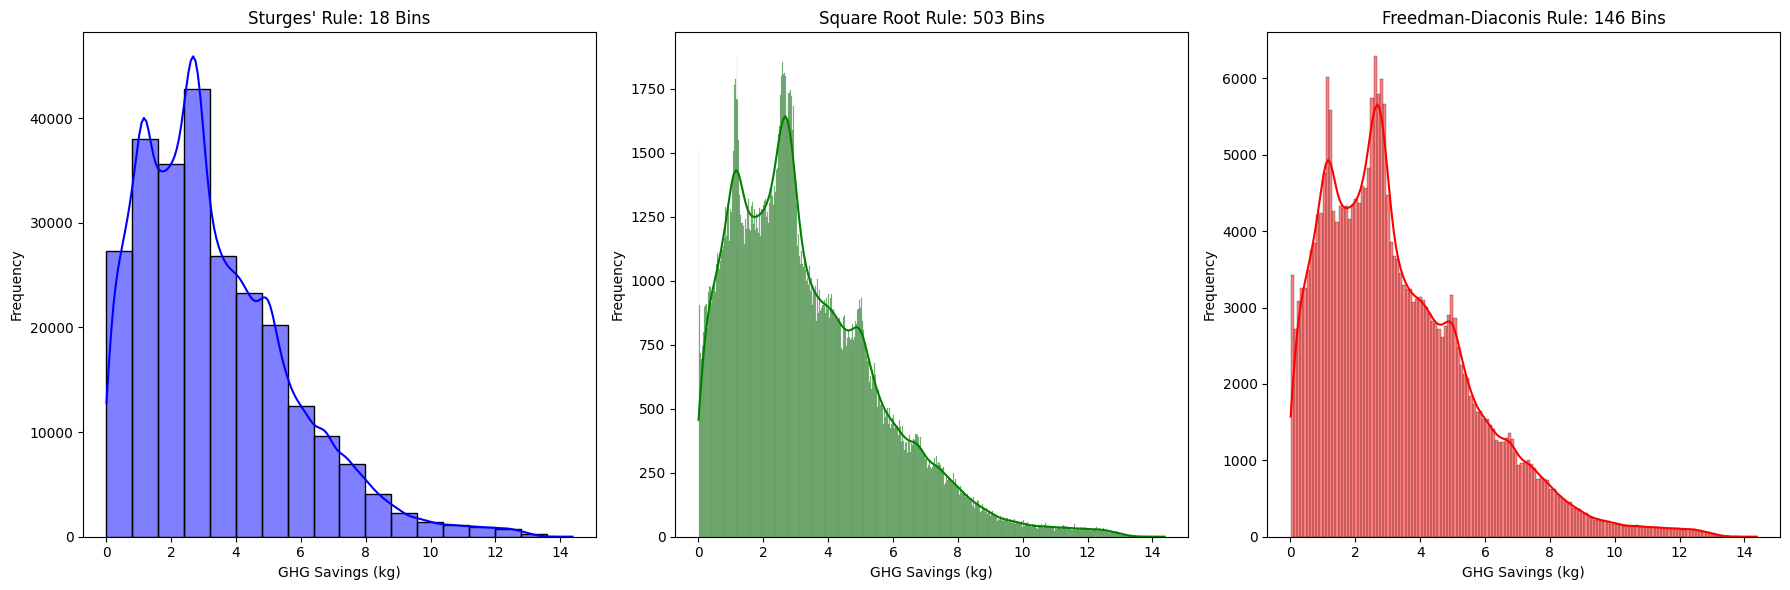

In [267]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['GHG Savings (kg)'], bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('GHG Savings (kg)')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['GHG Savings (kg)'], bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('GHG Savings (kg)')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['GHG Savings (kg)'], bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('GHG Savings (kg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Calculating Bins for 'Total Duration (hours)'

In [268]:
def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [ ]:
sbins = calculate_bins(df_cleaned['Total Duration (hours)'] , method = 'sturges')
sqrt_bins = calculate_bins(df_cleaned['Total Duration (hours)'] , method = 'sqrt')
fd_bins = calculate_bins(df_cleaned['Total Duration (hours)'] , method = 'fd')

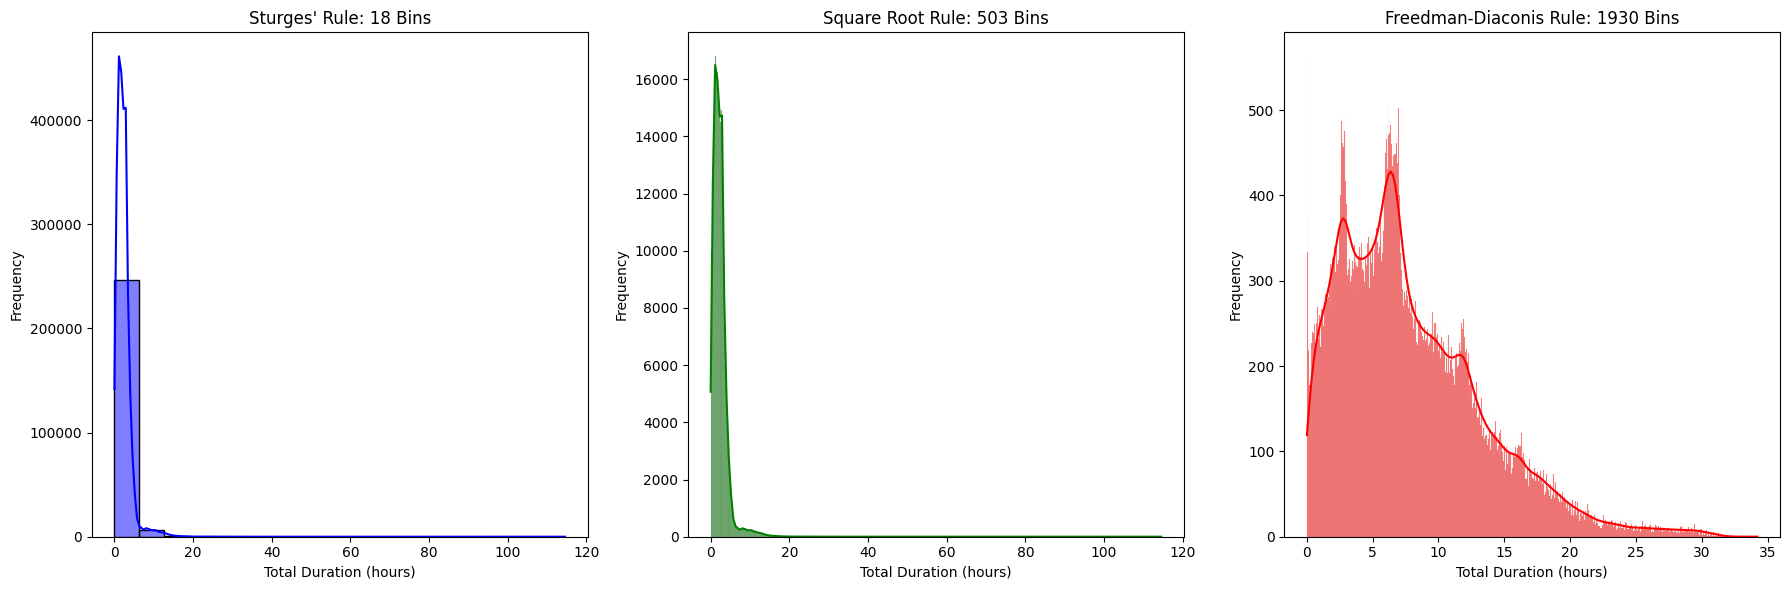

In [270]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Total Duration (hours)'], bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Total Duration (hours)'], bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Energy (kWh)'], bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Calculating Bins for 'Charging (hours)'

In [271]:
def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [ ]:
sbins = calculate_bins(df_cleaned['Charging (hours)'] , method = 'sturges')
sqrt_bins = calculate_bins(df_cleaned['Charging (hours)'] , method = 'sqrt')
fd_bins = calculate_bins(df_cleaned['Charging (hours)'] , method = 'fd')

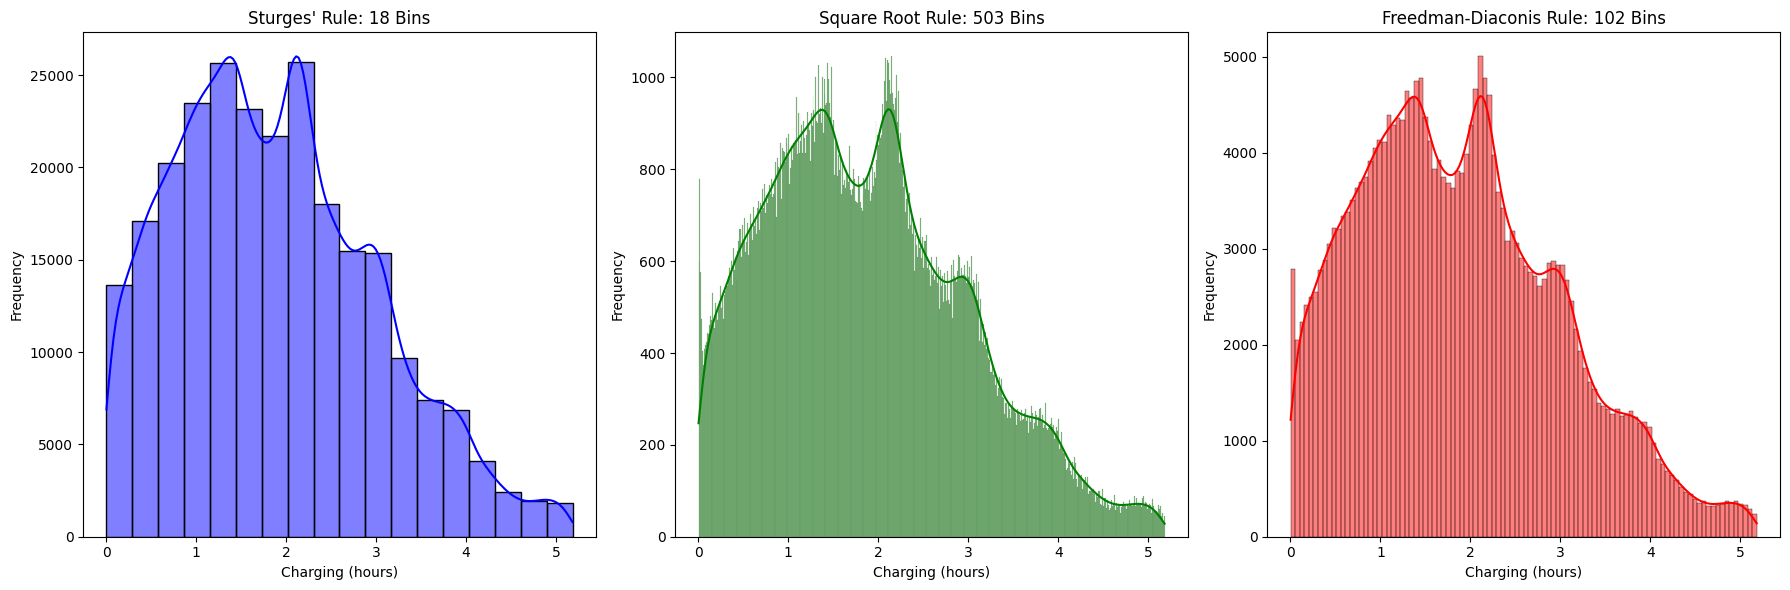

In [273]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Charging (hours)'], bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Charging (hours)')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Charging (hours)'], bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Charging (hours)')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Charging (hours)'], bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Charging (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Multivariate analysis

## Identifying moments of peak traffic

In [274]:
df_energy = df.groupby('day_of_week')['Energy (kWh)'].apply(list).apply(pd.Series).T
df_energy

day_of_week     Friday    Monday   Saturday     Sunday   Thursday   Tuesday  \
0             6.249457  5.041244   0.106588  17.171463  10.598673  3.516131   
1            12.238361  6.152762  14.951777   3.799148   2.003678  4.197217   
2             6.886972  5.255038   7.159643  16.238552   3.627027  8.497075   
3             3.956375  5.956442   1.957765   4.457012   8.740360  6.233372   
4             4.807265  0.737101   4.802880   8.940147   7.400985  2.832791   
...                ...       ...        ...        ...        ...       ...   
40482              NaN       NaN        NaN        NaN        NaN       NaN   
40483              NaN       NaN        NaN        NaN        NaN       NaN   
40484              NaN       NaN        NaN        NaN        NaN       NaN   
40485              NaN       NaN        NaN        NaN        NaN       NaN   
40486              NaN       NaN        NaN        NaN        NaN       NaN   

day_of_week  Wednesday  
0            12.837713  
1             4.620635  
2             2.340949  
3             3.013084  
4             8.832448  
...                ...  
40482         1.518000  
40483        27.320000  
40484         7.441000  
40485         4.494000  
40486         6.438000  

[40487 rows x 7 columns]

In [275]:
energy_sum = pd.DataFrame(df_energy.sum())
energy_sum.rename(columns = {0:'Total energy (kWh)'},inplace = True)

energy_sum

Total energy (kWh)
day_of_week                    
Friday            345814.444439
Monday            331308.907984
Saturday          258812.722494
Sunday            239555.025739
Thursday          348695.627962
Tuesday           343038.196224
Wednesday         349288.679678

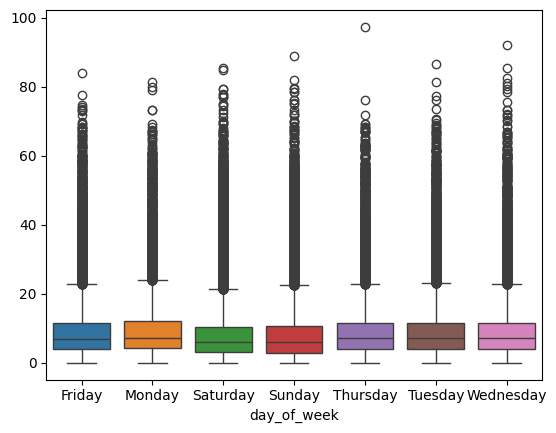

In [276]:
sns.boxplot(df_energy)
plt.show()

In [277]:
sns.barplot(energy_sum['Total energy (kWh)'])

<Axes: xlabel='day_of_week', ylabel='Total energy (kWh)'>

In [278]:
df_duration = df.groupby('day_of_week')['Total Duration (hours)'].apply(list).apply(pd.Series).T
df_duration

day_of_week    Friday    Monday  Saturday     Sunday  Thursday   Tuesday  \
0            3.058889  3.392778  0.035000   6.105278  3.673889  1.013889   
1            3.510000  3.484444  4.292222   1.165000  0.574722  1.211944   
2            2.268056  1.508611  2.056667   4.829444  1.595556  2.446111   
3            1.234167  1.723333  1.190000  18.315833  2.975833  2.251667   
4            1.648611  1.574722  3.870278   3.546667  2.471389  0.821944   
...               ...       ...       ...        ...       ...       ...   
40482             NaN       NaN       NaN        NaN       NaN       NaN   
40483             NaN       NaN       NaN        NaN       NaN       NaN   
40484             NaN       NaN       NaN        NaN       NaN       NaN   
40485             NaN       NaN       NaN        NaN       NaN       NaN   
40486             NaN       NaN       NaN        NaN       NaN       NaN   

day_of_week  Wednesday  
0             3.681389  
1             1.742222  
2             0.812778  
3             1.045833  
4             9.985278  
...                ...  
40482         0.258056  
40483         4.526667  
40484         2.653333  
40485         0.765000  
40486         2.036944  

[40487 rows x 7 columns]

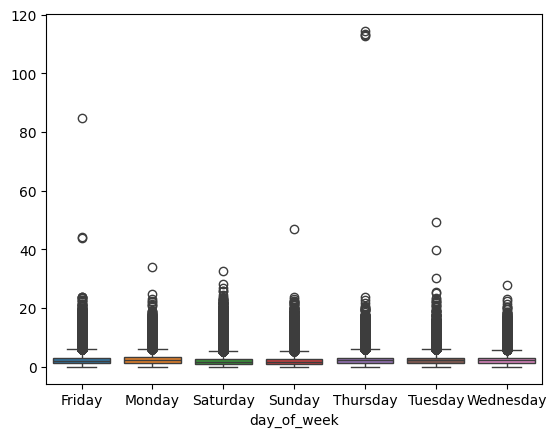

In [279]:
sns.boxplot(df_duration)
plt.show()

In [280]:
duration_sum = pd.DataFrame(df_duration.sum())
duration_sum.rename(columns = {0:'Total duration (hours)'},inplace = True)

duration_sum

Total duration (hours)
day_of_week                        
Friday                101243.029167
Monday                 96771.948611
Saturday               73273.735556
Sunday                 66398.700556
Thursday              102544.885000
Tuesday               101582.075278
Wednesday             103304.249444

<Axes: xlabel='day_of_week', ylabel='Total duration (hours)'>

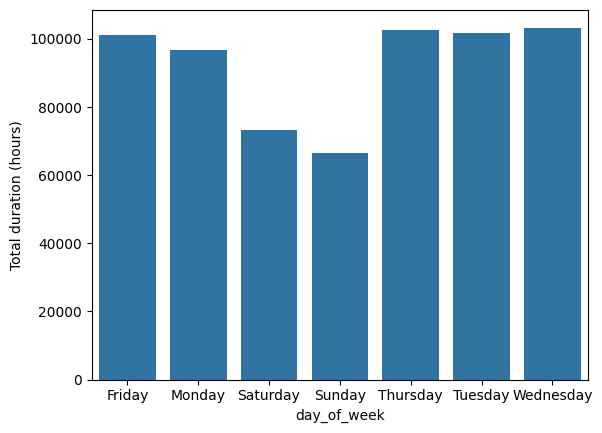

In [281]:
sns.barplot(duration_sum['Total duration (hours)'])

# Pairplot

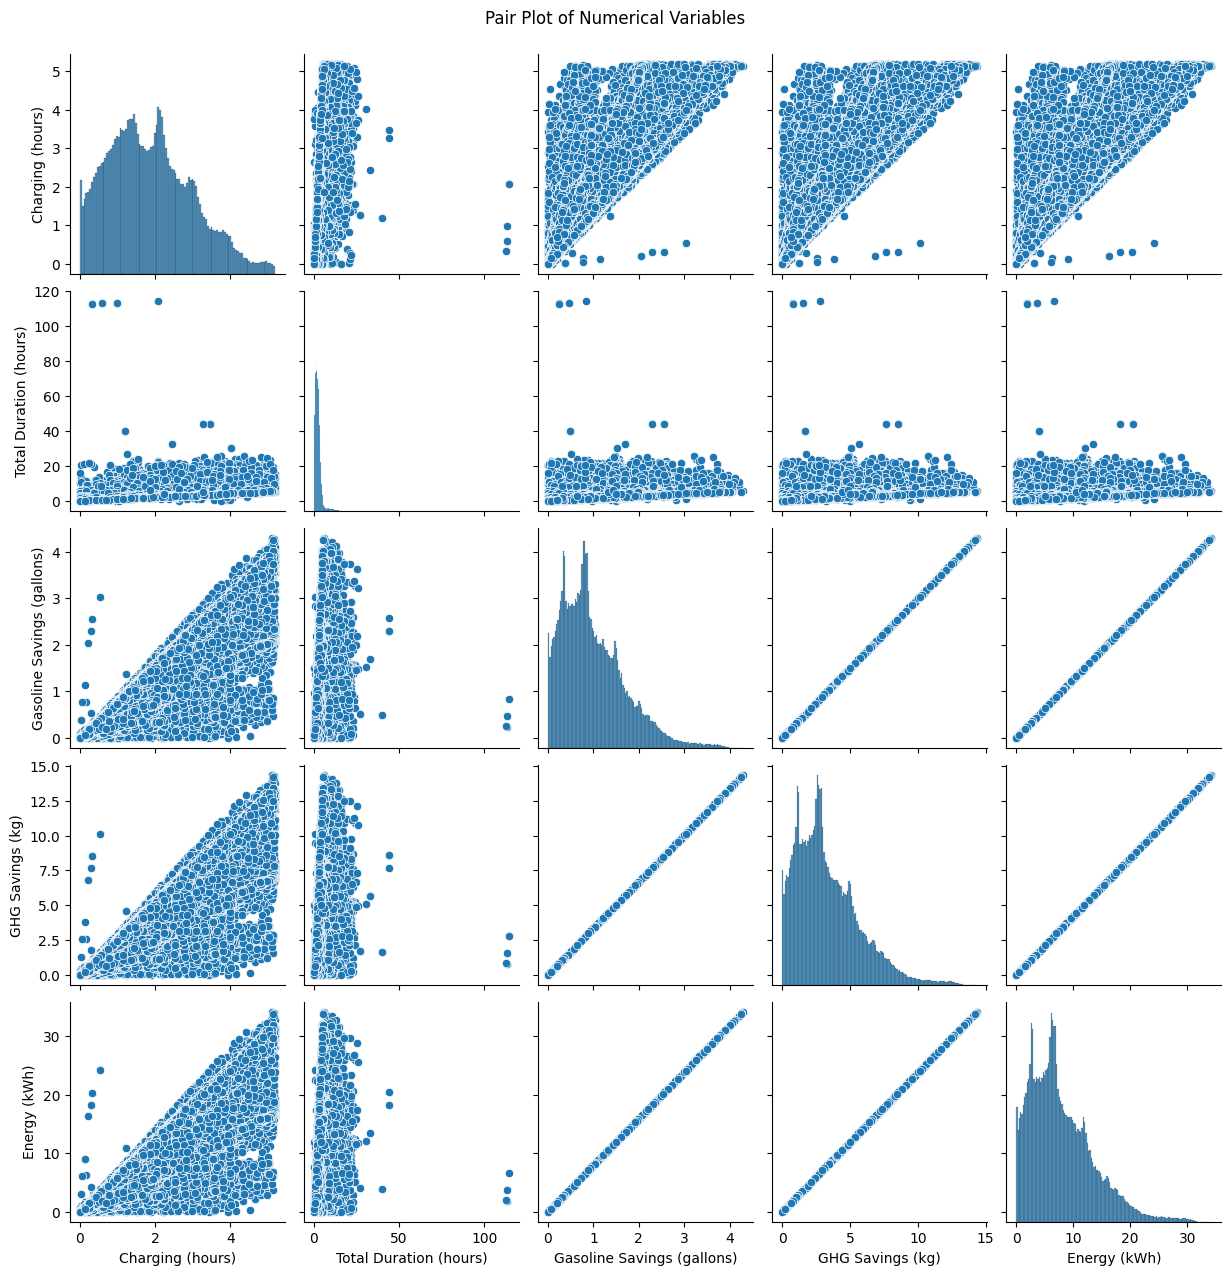

In [282]:
numerical_columns = ['Charging (hours)', 'Total Duration (hours)', 'Gasoline Savings (gallons)', 'GHG Savings (kg)', 'Energy (kWh)']

sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Correlation matrix

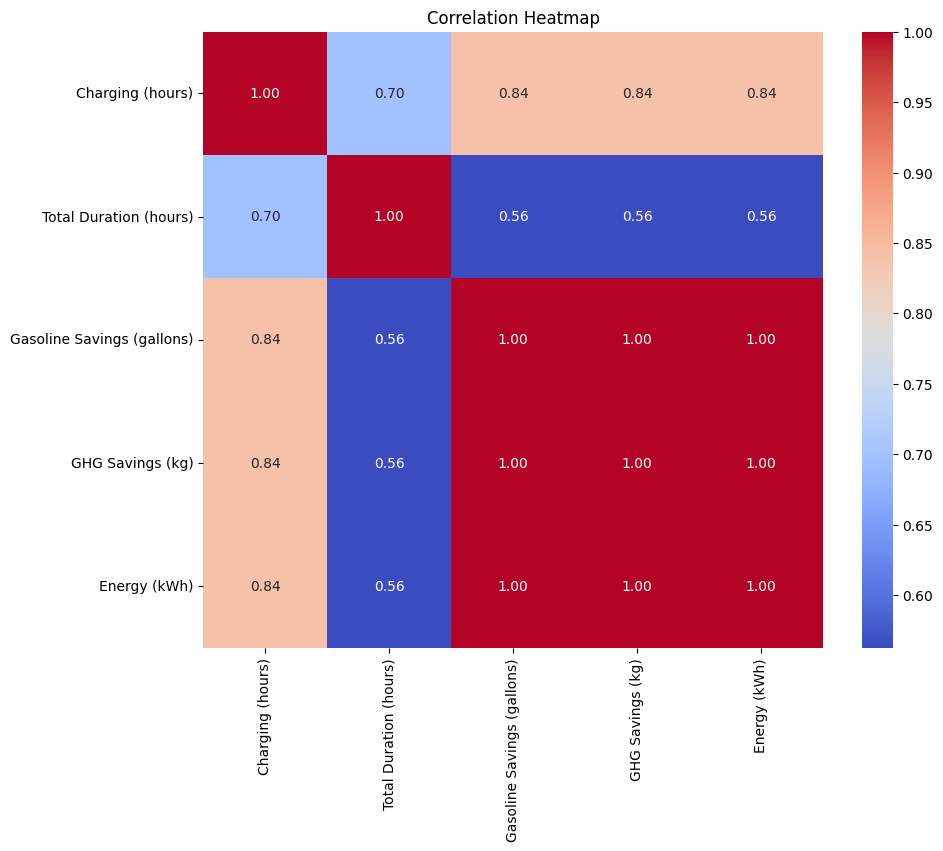

In [283]:
corr_matrix = df_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()